In [376]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

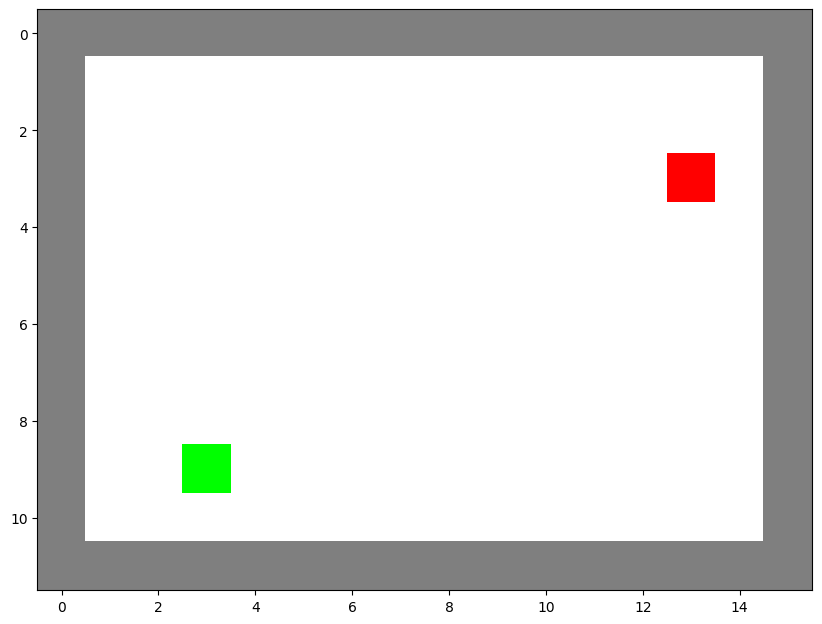

In [377]:
img = np.asarray(Image.open('pic2.png'))
imgplot = plt.imshow(img)

In [378]:
def getPointByColor(r, g, b, image):
    x, y = 0, 0
    for idi, i in enumerate(image):
        for idj, j in enumerate(i):
            if j[0] == r and j[1] == g and j[2] == b:
               x = idj
               y = idi
    return x, y


In [379]:
startPoint = getPointByColor(0, 255, 0, img)
endPoint = getPointByColor(255, 0, 0, img)
print(f'StartPoint = {startPoint}\nEndPoint = {endPoint}')

StartPoint = (3, 9)
EndPoint = (13, 3)


In [380]:
def isWall(x, y, image):
    if image[y][x][0] < 128 and image[y][x][1] < 128 and image[y][x][2] < 128: return True
    else: return False

def getNextPoints(x, y, image):
    maxPos = image.shape
    nextPoints = []
    for i in np.arange(-1,2,1):
        for j in np.arange(-1,2,1):
            if i != 0 or j != 0:
                xn = x+i
                yn = y+j
                if xn >= 0 and yn >= 0 and xn <= maxPos[1] and yn <= maxPos[0] and not isWall(xn, yn, image):
                    nextPoints.append([xn, yn])
    return nextPoints

def getDistance(x, y, x_target, y_target):
    return np.sqrt(np.abs(x-x_target)**2 + np.abs(y-y_target)**2)

[1, 2]
[2, 1]
[2, 2]


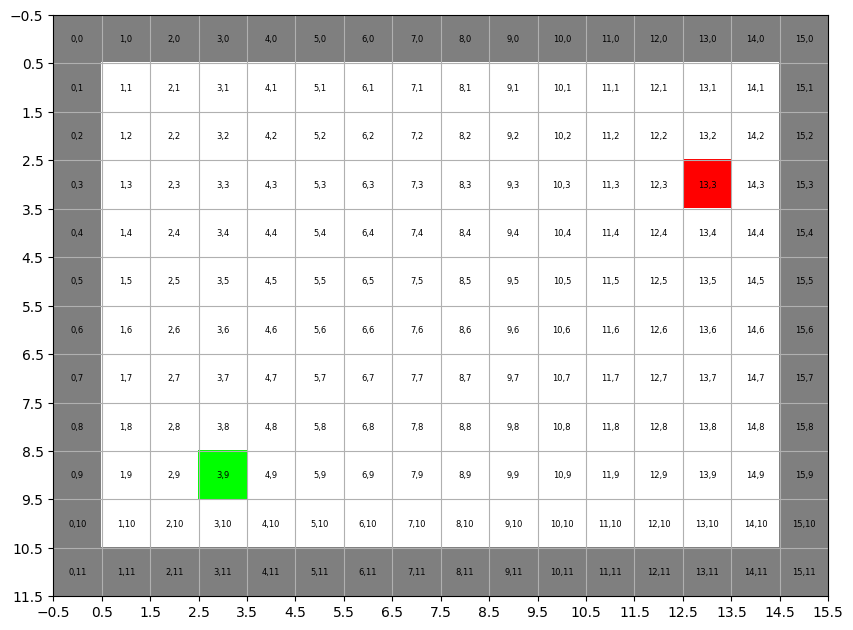

In [381]:
nextPoints = getNextPoints(1,1, img)

for i in nextPoints:
    print(i)


numbers = []
for i in range(img.shape[0]):
    number = []
    for j in range(img.shape[1]):
        number.append(f'{j},{i}')
    numbers.append(number)
    number = []


x_ticks = np.arange(-0.5, img.shape[1]+0.5, 1)
y_ticks = np.arange(-0.5, img.shape[0]+0.5, 1)

plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

for (j,i),label in np.ndenumerate(numbers):
    plt.text(i,j,label,ha='center',va='center',fontsize=6)
plt.rcParams['figure.figsize'] = [10, 10]

plt.imshow(img)



In [382]:
costs = []
for i in range(img.shape[0]):
    temp = []
    for j in range(img.shape[1]):
        temp.append("")
    costs.append(temp)
    temp = []

In [383]:
class Point:
    def __init__(self, x, y, cost, isActive, distanceToTarget):
        self.x = x
        self.y = y
        self.cost = cost
        self.isActive = isActive,
        self.distanceToTarget = distanceToTarget


In [384]:
nextPoints = getNextPoints(startPoint[0], startPoint[1], img)
distance = 1
distanceDiagonal = np.sqrt(distance**2 + distance**2)
print(f'Distance = {distance}\nDiagonal = {distanceDiagonal}')

pointList = []

for point in nextPoints:
    dist = 0
    if point[0] != startPoint[0] and point[1] != startPoint[1]:
        dist = round(distanceDiagonal,1)
    else:
        dist = distance
    
    distanceToTarget = getDistance(point[0], point[1], endPoint[0], endPoint[1])
    costs[point[0]][point[1]] = dist
    pointList.append(Point(point[0], point[1], dist, True, distanceToTarget))

Distance = 1
Diagonal = 1


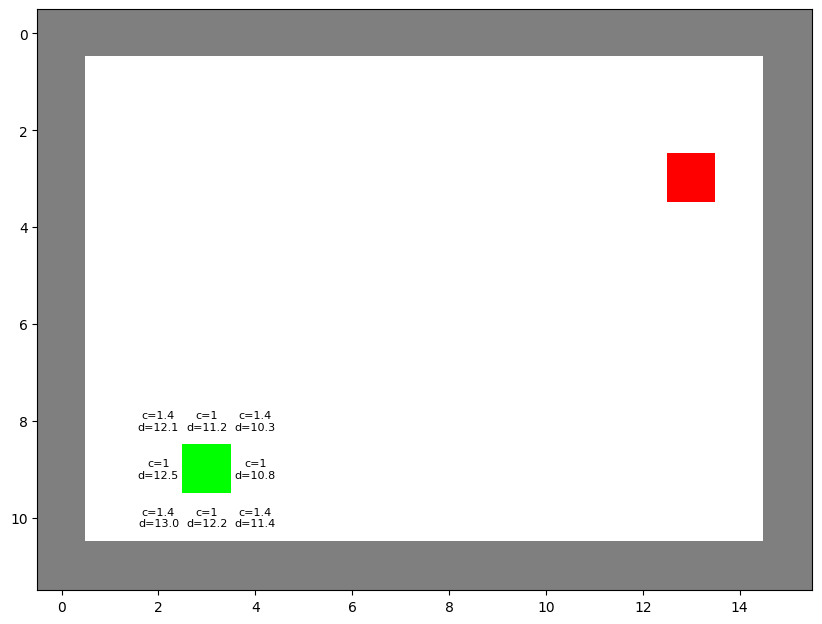

In [389]:
#for (j,i),label in np.ndenumerate(costs):
#    plt.text(i,j,label,ha='center',va='center',fontsize=12)

for point in pointList:
    label = f'c={point.cost}\nd={round(point.distanceToTarget,1)}'
    plt.text(point.x, point.y, label, ha='center',va='center',fontsize=8)

plt.imshow(img)